This dataset is to predict the loan amount for which a customer can request a
bank with his/her collateral house.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/house_loan_updated.csv')
data.head(10)

#1.Analyzing

In [32]:
#Print number of rows & columns in dataset
data.shape

(47297, 8)

In [33]:
#Describe min, max, average, sum of each object
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd80277e50>,
      dtype=object)

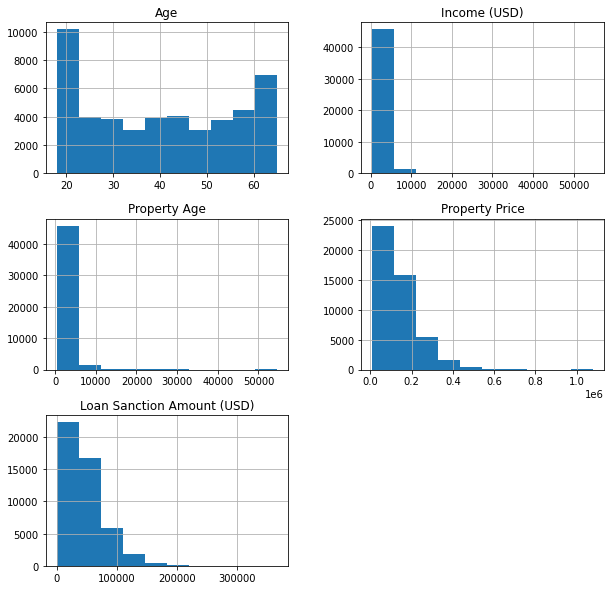

In [35]:
data.hist(column=data.describe().columns, figsize=(10, 10))  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

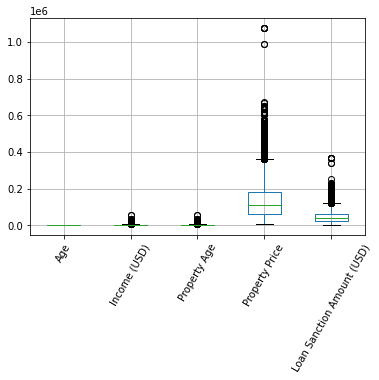

In [36]:
#Create boxplot for all continuous columns
data.boxplot()
plt.xticks(rotation = 60)

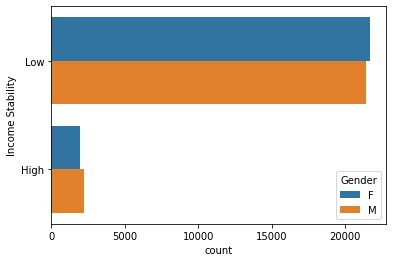

In [95]:
# Countplot with Income Stability, using Gender parameter to split counts in to category Income Satbility.
sns.countplot(y="Income Stability", data=data, hue="Gender")          

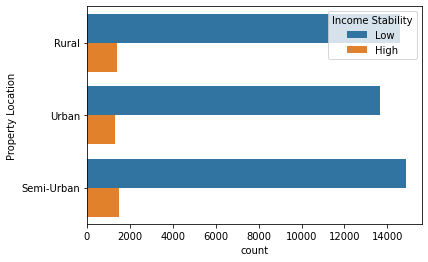

In [96]:
# Countplot with Property Location, using Income Stability parameter to split counts in to category Property Location.
sns.countplot(y="Property Location", data=data, hue="Income Stability")

#2.Pre-processing

Gender, Income Stability, Property Location contain categorical values. To make a linear regression using sklearn library, these values have to be converted to numerical data. For short, I will use dummy encoding for this converting process.

In [37]:
cat_col = [col for col in data.columns if data[col].dtypes == object]

In [38]:
from sklearn.preprocessing import LabelEncoder  
label_encoder = LabelEncoder()

encoder = LabelEncoder()
for col in cat_col:
  idx = ~data[col].isna()
  data.loc[idx, col] \
    = encoder.fit(data.loc[idx, col]).transform(data.loc[idx, col])

In [39]:
#Dataset after converting categorial values to numerical values
data.head(10)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336
5,0,28,1912.18,1,1919.18,2,28692.18,10055.743846
6,0,59,1586.55,1,1584.55,2,142026.71,45336.365654
7,0,21,6229.34,1,6229.34,1,221243.65,79562.985181
8,0,60,904.26,1,901.26,0,49290.34,13545.640371
9,0,61,1523.72,1,1514.72,2,59790.35,17486.116124


In [40]:
#Check to see which columns have null values
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

Income, Income Stability, Property Age, Property Location are columns with null values since the total of non-null values are differ from the dataset's row: 47292 rows.
Because data is important and the number of null values in each columns is not too much (smaller than 50) compared to the total data samples, I will fill in all the null values instead of dropping all of them.

In [41]:
#Get the name of all columns with null values
null_col = data.columns[data.isnull().any()]

In [42]:
#Print all data samples have null value(s)
null_row_index = (data.isnull()[data.isnull().values == True]).index
data.loc[null_row_index]

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
655,1,31,NaN,1,NaN,2,111269.68,48800.55
655,1,31,NaN,1,NaN,2,111269.68,48800.55
2553,0,33,2271.13,NaN,2271.13,0,71140.56,45323.05
3069,0,52,NaN,1,NaN,0,100977.88,55158.14
3069,0,52,NaN,1,NaN,0,100977.88,55158.14
...,...,...,...,...,...,...,...,...
45098,1,53,NaN,1,NaN,2,107571.07,64970.56
45098,1,53,NaN,1,NaN,2,107571.07,64970.56
46349,0,36,NaN,1,NaN,NaN,20939.80,12206.07
46349,0,36,NaN,1,NaN,NaN,20939.80,12206.07


I will use the iterative imputation null values with a machine learning model to fill in the null. In the scikitlearn library, I will use the RandomForestRegressor function as it will control the accuracy of filling null process.

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
data_notnull = pd.DataFrame(imptr.fit_transform(data[null_col]), columns = null_col)

In [44]:
#Print data after filling null values
data.drop(labels = null_col, axis = 'columns')
data[null_col] = data_notnull[null_col]
data.loc[null_row_index]

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
655,1,31,3806.402600,1.0,3804.352400,2.00,111269.68,48800.55
655,1,31,3806.402600,1.0,3804.352400,2.00,111269.68,48800.55
2553,0,33,2271.130000,1.0,2271.130000,0.00,71140.56,45323.05
3069,0,52,3216.163233,1.0,3225.078667,0.00,100977.88,55158.14
3069,0,52,3216.163233,1.0,3225.078667,0.00,100977.88,55158.14
...,...,...,...,...,...,...,...,...
45098,1,53,3806.402600,1.0,3804.352400,2.00,107571.07,64970.56
45098,1,53,3806.402600,1.0,3804.352400,2.00,107571.07,64970.56
46349,0,36,3201.001667,1.0,3204.359886,1.01,20939.80,12206.07
46349,0,36,3201.001667,1.0,3204.359886,1.01,20939.80,12206.07


In [45]:
data.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

#3.Split train/test sets

In [86]:
#Determining data feature and data label
columns = data.columns.tolist()    
columns.remove('Loan Sanction Amount (USD)')                    
data_feature = data[columns]        
data_label = data['Loan Sanction Amount (USD)']  

In [87]:
#Split the data into training set and testing set
from sklearn.model_selection import train_test_split
trainX,testX, trainY,testY = train_test_split(data_feature, data_label, train_size=0.70)     # Split the data into two subsets for training and testing.
print('Training:' + str(trainX.shape))     # Count data samples in Training set.
print('Test:' + str(testX.shape))          # Count data samples in Test set.

Training:(32626, 7)
Test:(13984, 7)


##Feature scaling

In [46]:
#Calculate how many outliers in each columns
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Gender                           0
Age                              0
Income (USD)                  2075
Income Stability              4213
Property Age                  2073
Property Location                0
Property Price                1454
Loan Sanction Amount (USD)    1490
dtype: int64

Though there're many columns have outliers, I decide not to remove any outliers. Instead, I will use RobustScaler for feature scaling as this feature scaling method will work better for data with outliers.

In [88]:
#Feature scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
trainX_scaler = scaler.fit_transform(trainX)
testX_scaler = scaler.transform(testX)

#4.Linear Regression model

##Training model

In [97]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(trainX_scaler, trainY)

reg.coef_, reg.intercept_

(array([  -232.6018624 ,  -2377.62281172,    379.14890278, -11140.54985455,
          1107.19010355,   -120.2238824 ,  38894.19378799]), 37179.7996651805)

##Making prediction

In [90]:
testYpred = reg.predict(testX_scaler)

In [91]:
testY

29929     27783.542311
32872    127313.245073
9711      52404.029503
34242     18205.558447
11683     47835.189209
             ...      
32270     59077.694030
33038     18395.406011
44235     24190.438742
11531     70856.262696
20814     29806.213249
Name: Loan Sanction Amount (USD), Length: 13984, dtype: float64

#5.Evaluating model performance

In [98]:
# Calculate test accuracy
reg.score(testX_scaler, testY)

0.9972878440515871

In [99]:
from sklearn.metrics import mean_absolute_error, f1_score
mean_absolute_error(y_pred=testYpred, y_true=testY) 

174.17945304561277